Task 1

In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = '/content/cleaned_dataset.csv'
data = pd.read_csv(file_path)

Data Preparation

In [3]:
# Add an 'age' column based on the car's year and the current year (e.g., 2024)
data['age'] = 2024 - data['year']

# Select features and target variable
features = ['mileage(km/ltr/kg)', 'engine', 'age']
target = 'selling_price'

# Drop rows with missing values for the selected columns
data = data.dropna(subset=features + [target])

X = data[features]
y = data[target]

Data Splitting

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Implementation

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Evaluation

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 400254620308.0418
R² Score: 0.3893758636575103


Feature Analysis

In [7]:
# Get the feature importance (coefficients of the linear regression model)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


              Feature   Coefficient
1              engine    711.020945
0  mileage(km/ltr/kg)    577.712934
2                 age -78356.062860


Task 2


Create Binary Target


*   If selling_price > median price, it’s classified as "High Price" (1)
*  If selling_price <= median price, it’s classified as "Low Price" (0)



In [8]:
# Calculate the median selling price
median_price = data['selling_price'].median()

# Create a binary target: 1 for "High Price", 0 for "Low Price"
data['price_category'] = (data['selling_price'] > median_price).astype(int)

# Check the new binary target distribution
print(data['price_category'].value_counts())


price_category
0    4186
1    3942
Name: count, dtype: int64


Logistic Regression Implementation

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Select features and the new binary target variable
X = data[features]  # Using 'mileage', 'engine', 'age' as features
y = data['price_category']  # Target variable: 'price_category'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model using different metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.8370233702337023
Precision: 0.8070818070818071
Recall: 0.8606770833333334
F1-Score: 0.8330182734719597


Task 3

Train the Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeRegressor  # For regression task
# If you're using classification, use DecisionTreeClassifier instead

# Initialize the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)


# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

Visualizing the Decision Tree

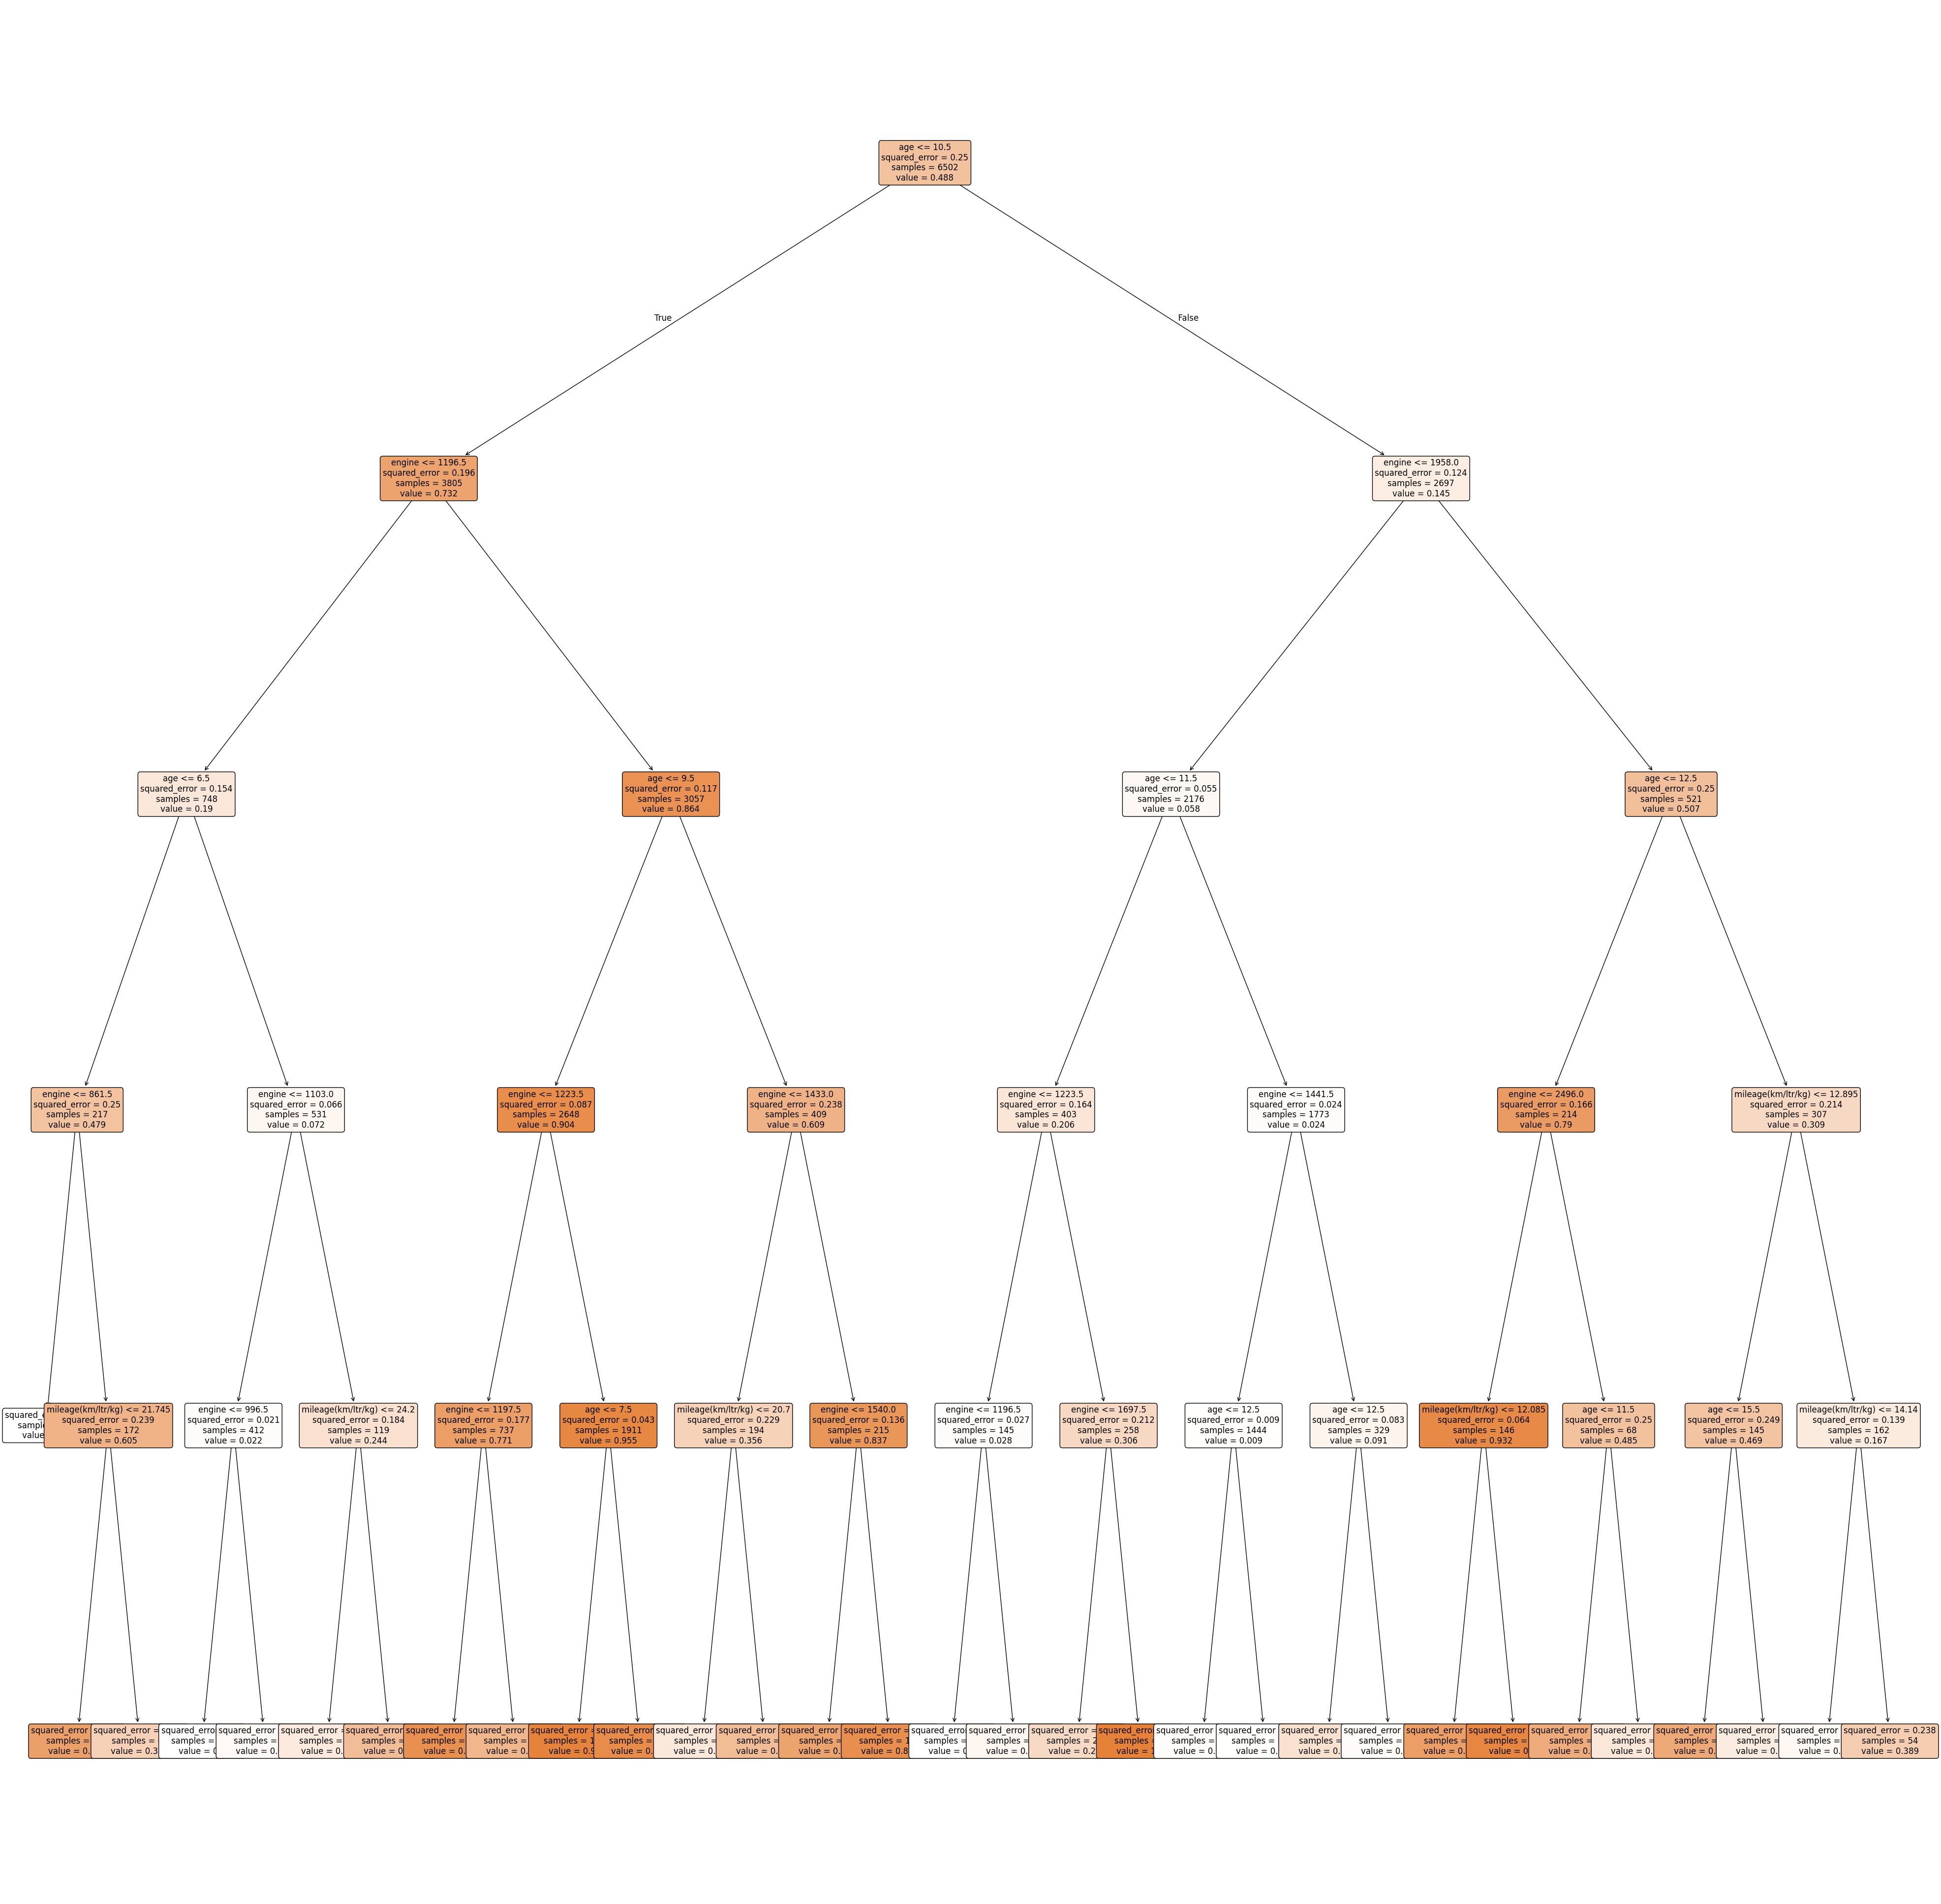

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(50, 50))
plot_tree(tree_model, feature_names=features, filled=True, rounded=True, fontsize=12)
# Save the figure
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.show()


Performance Evaluation

In [13]:
from sklearn.metrics import mean_squared_error

# Predict on training and testing data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Calculate MSE for both training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE values
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training MSE: 0.07433363957726663
Testing MSE: 0.09608578091023902


Feature Importance

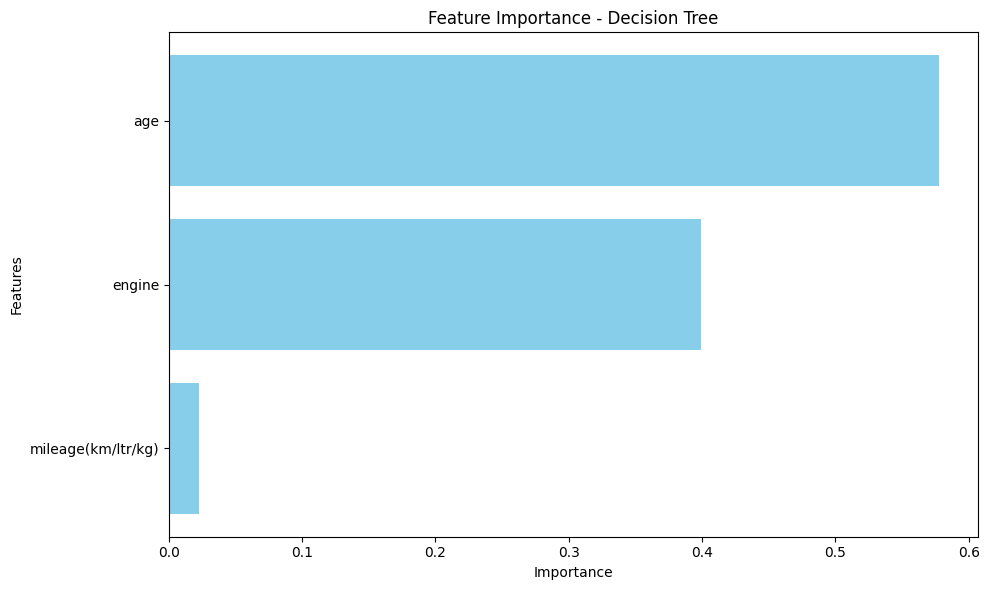

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained Decision Tree model
importance = tree_model.feature_importances_

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # Optional: invert y-axis for better readability
plt.tight_layout()

# Save the plot as an image
plt.savefig("decision_tree_feature_importance.png", dpi=300, bbox_inches="tight")  # Save as PNG

# Show the plot
plt.show()


Task 4

Implementing the Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestRegressor  # For regression task
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Compare Performance

In [16]:
# Predict on training and testing data using the Random Forest model
y_train_rf_pred = rf_model.predict(X_train)
y_test_rf_pred = rf_model.predict(X_test)

# Calculate MSE for both training and testing data for Random Forest
train_rf_mse = mean_squared_error(y_train, y_train_rf_pred)
test_rf_mse = mean_squared_error(y_test, y_test_rf_pred)

# Print MSE values for comparison
print(f"Decision Tree Training MSE: {train_mse}")
print(f"Decision Tree Testing MSE: {test_mse}")
print(f"Random Forest Training MSE: {train_rf_mse}")
print(f"Random Forest Testing MSE: {test_rf_mse}")


Decision Tree Training MSE: 0.07433363957726663
Decision Tree Testing MSE: 0.09608578091023902
Random Forest Training MSE: 0.030835775058877524
Random Forest Testing MSE: 0.06515125594551487


Feature Importance with Random Forest

In [17]:
# Get feature importance from the trained Random Forest model
rf_importance = rf_model.feature_importances_

# Create a DataFrame to display the feature importance
rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print(rf_importance_df)


              Feature  Importance
2                 age    0.483350
1              engine    0.367273
0  mileage(km/ltr/kg)    0.149377


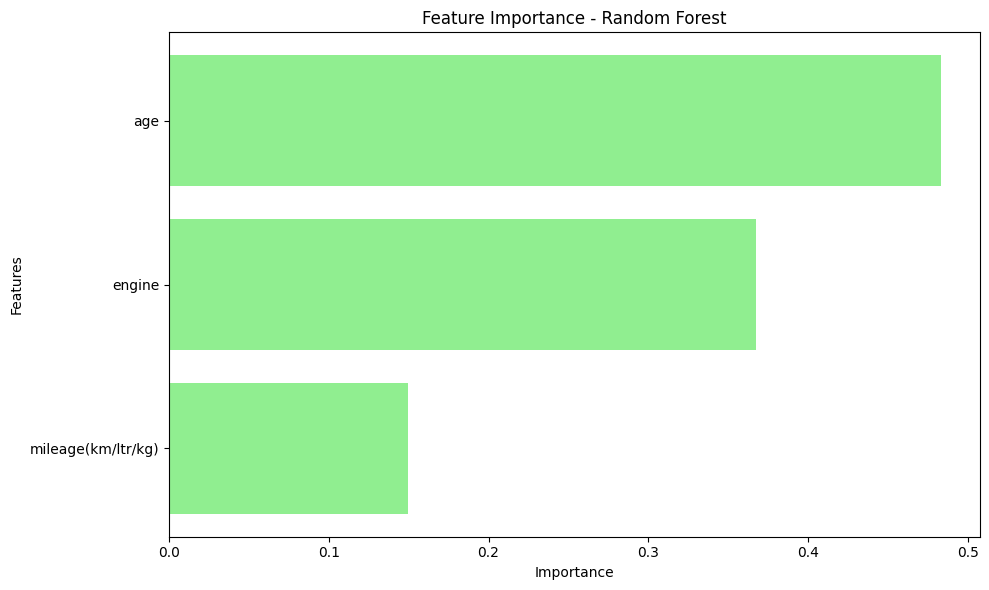

In [18]:
# Bar plot for Random Forest feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the figure as an image
plt.savefig("random_forest_feature_importance.png", dpi=300, bbox_inches="tight")  # Save as PNG

# Show the plot
plt.show()


# Task 5: Model Evaluation and Comparison

## Model Evaluation Metrics

### **Linear Regression (Regression Task)**
- **Mean Squared Error (MSE)**: 400,254,620,308.04 — This is very high, indicating poor performance.
- **R² Score**: 0.39 — A relatively low R², suggesting that the model does not explain much of the variance in car prices.

### **Logistic Regression (Classification Task: High/Low Price)**
- **Accuracy**: 0.84 — This is a solid result for binary classification.
- **Precision**: 0.81 — Indicates that 81% of the high-price predictions were correct.
- **Recall**: 0.86 — 86% of the actual high-price cars were correctly identified.
- **F1-Score**: 0.83 — A balanced measure of Precision and Recall, showing a good trade-off.

### **Decision Tree (Regression Task)**
- **MSE (Training)**: 0.0743
- **MSE (Testing)**: 0.0961 — The model performs well on both training and testing sets, with low error.
- **Feature Importance**:
  - **Age**: 0.5778 — The most important feature, indicating that the car's age is a key factor in predicting its price.
  - **Engine**: 0.3995 — The engine size or capacity is also a significant factor.
  - **Mileage (km/ltr/kg)**: 0.0227 — Less influential compared to age and engine size.

### **Random Forest (Regression Task)**
- **MSE (Training)**: 0.031
- **MSE (Testing)**: 0.065 — Random Forest performs better than the Decision Tree, with even lower error on testing data.
- **Feature Importance**:
  - **Age**: 0.4834 — Age remains the most influential feature, though slightly less impactful than in the Decision Tree.
  - **Engine**: 0.3673 — The engine feature is important but slightly less significant than in the Decision Tree.
  - **Mileage (km/ltr/kg)**: 0.1494 — This feature has a greater influence in Random Forest than in Decision Tree.

## **Comparison of Models**

| Model               | Task                | MSE (Training) | MSE (Testing) | R² (Regression) | Accuracy (Classification) | Precision | Recall | F1-Score | Feature Importance (if available) |
|---------------------|---------------------|----------------|---------------|-----------------|---------------------------|-----------|--------|----------|-----------------------------------|
| **Linear Regression**| Car Price Prediction | -              | -             | 0.39            | -                         | -         | -      | -        | -                                 |
| **Logistic Regression** | Price Classification (High/Low) | -  | -            | -               | 0.84                      | 0.81      | 0.86   | 0.83     | -                                 |
| **Decision Tree**     | Car Price Prediction | 0.0743         | 0.0961        | -               | -                         | -         | -      | -        | Yes (Age: 0.5778, Engine: 0.3995, Mileage: 0.0227) |
| **Random Forest**     | Car Price Prediction | 0.031          | 0.065         | -               | -                         | -         | -      | -        | Yes (Age: 0.4834, Engine: 0.3673, Mileage: 0.1494) |

## **Comparison and Conclusion**

1. **Regression Task (Car Price Prediction)**:
   - **Random Forest** performs the best, with the lowest MSE in both training and testing sets.
   - **Decision Tree** is also a strong contender, though slightly less accurate than Random Forest.
   - **Linear Regression** is less effective due to its high MSE and low R².

2. **Classification Task (High/Low Price)**:
   - **Logistic Regression** performs well with an accuracy of 84% and balanced Precision, Recall, and F1-Score, making it the best choice for the binary classification task.

3. **Feature Importance**:
   - In both the **Decision Tree** and **Random Forest**, **Age** and **Engine** are the most important features for predicting car prices.
   - **Mileage (km/ltr/kg)**, while important, has a smaller impact on predictions.

## **Final Recommendations**:
- For **regression tasks** (predicting car prices), **Random Forest** is the best model due to its superior performance in minimizing error.
- For **classification tasks** (High/Low Price), **Logistic Regression** is recommended as it gives strong performance with balanced metrics.
- **Feature Importance** analysis shows that **Age** and **Engine** are crucial for price prediction, with **Mileage** being less important.

---



Task 6

1. Decision Tree Hyperparameter Tuning with GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters: ", grid_search.best_params_)

# Best model after tuning
best_dt_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


2. Random Forest Hyperparameter Tuning with RandomizedSearchCV

In [20]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],       # fewer trees
    'max_depth': [10, 20],           # smaller tree depths
    'min_samples_split': [2, 5],     # fewer minimum splits
    'min_samples_leaf': [1, 2]       # fewer leaf samples
}


randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                       n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_train, y_train)

print("Best Parameters: ", randomized_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


k-Fold Cross-Validation

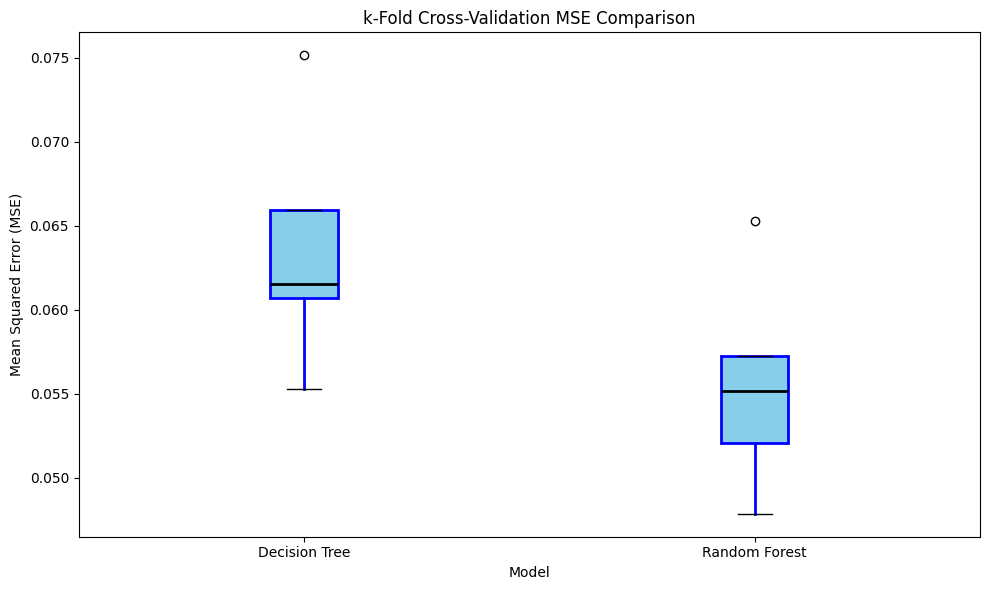

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# Define the models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE (since sklearn returns negative values for error metrics)
dt_cv_scores = -dt_cv_scores
rf_cv_scores = -rf_cv_scores

# Plotting the results
plt.figure(figsize=(10, 6))

# Boxplot for Decision Tree and Random Forest
plt.boxplot([dt_cv_scores, rf_cv_scores], labels=['Decision Tree', 'Random Forest'], patch_artist=True,
            medianprops=dict(color='black', linewidth=2),
            boxprops=dict(facecolor='skyblue', color='blue', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=2))

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('k-Fold Cross-Validation MSE Comparison')

# Save the plot
plt.tight_layout()
plt.savefig("k_fold_cross_validation_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


1. Evaluate Model Performance After Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for Decision Tree Regressor
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

# Set up GridSearchCV for Decision Tree Regressor
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", grid_search_dt.best_params_)
print("Best score found: ", grid_search_dt.best_score_)

# Get the best model from the grid search
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the Decision Tree model on the test set
y_pred_dt = best_dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - MSE: {mse_dt}, R²: {r2_dt}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score found:  0.7622740939103752
Decision Tree - MSE: 0.06981224873323838, R²: 0.7198928453224562
